# Homework #4

## Recursive Fibonacci

Write a function **fib** that takes one argument, *n*, and returns the *nth* fibonacci number. 

The fibonacci sequence is given by the recursive formulation:

> ```
> fib(i) = fib(i-1) + fib(i-2)
> ```

and then by a termination criteria that **fib(1)** is 1 and **fib(2)** is also 1.

Write the fib function so that it calls itself. Measure the running time to compute each of the fibonacci numbers between 1 and 40 and create a plot with your favorite plotting tool.


In [24]:
def fib(n):
  if n == 0: # Base case: 0
    return 0
  elif n == 1 or n == 2: # Base case: 1 and 2
    return 1
  else: # Recursive call
    return fib(n-1) + fib(n-2)

Let's first test the fibonacci function.

In [25]:
print("Fibonacci of 1: ", fib(1))
print("Fibonacci of 3: ", fib(3))
print("Fibonacci of 5: ", fib(5))
print("Fibonacci of 8: ", fib(8))

Fibonacci of 1:  1
Fibonacci of 3:  2
Fibonacci of 5:  5
Fibonacci of 8:  21


In [71]:
%%timeit -n 10

fib(25)

10 loops, best of 5: 23.7 ms per loop


Creating a plot with matplotlib's pyplot.

The resulted plot shows that the first implementation of the fibonacci function is around O(2^n).

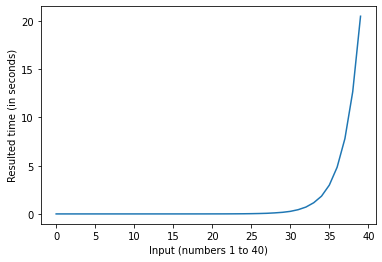

In [39]:
import timeit
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

def plot_time(func, inputs, repeats, n_tests):
  x, y = [], [] # save vaalues for x-axis and y-axis
  for i in inputs:
    timer = timeit.Timer(partial(func, i)) # create a timer with the function and its argument n
    t = timer.repeat(repeat=repeats, number=n_tests) # run that function several times
    x.append(i) # add the argument to the x-axis
    y.append(np.mean(t)) # add the mean time for execution to the y-axis
 
  plt.plot(x, y)
  plt.xlabel("Input (numbers 1 to 40)")
  plt.ylabel("Resulted time (in seconds)")

plot_time(fib, range(40), 3, 1)

## Iterative Fibonacci

The *nth* fibonacci number can be computed more efficiently by not using recursion, but instead **by building up the answer from the bottom**.

Create an iterative version of the fibonacci function, **fib_iterative**, that takes one argument, *n*, and returns the *nth* fibonacci number.

Allocate a list of length *n*. Initialize fib[0] = 1 and fib[1] = 1. Then fill in each entry in your list in ascending order with:

> ```
> mylist[i] = mylist[i-1] + mylist[i-2]
> ```

Measure the running time of **fib_iterative** for each of the fibonacci numbers between 1 and 40.

In [57]:
def fib_iterative(n):
  my_list = [1 for i in range(n)] # Allocate a list

  for i in range(2, n): # Populate the list with fib numbers
    my_list[i] = my_list[i-1] + my_list[i-2]

  return my_list[n-1] # Return the required number

Let's test the iterative fibonacci function

In [61]:
print("Fibonacci of 1: ", fib_iterative(1))
print("Fibonacci of 3: ", fib_iterative(3))
print("Fibonacci of 5: ", fib_iterative(5))
print("Fibonacci of 8: ", fib_iterative(8))

Fibonacci of 1:  1
Fibonacci of 3:  2
Fibonacci of 5:  5
Fibonacci of 8:  21


In [70]:
%%timeit -n 10
fib_iterative(25)

10 loops, best of 5: 4.72 µs per loop


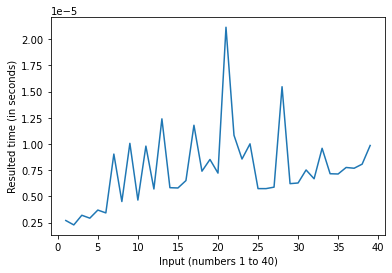

In [63]:
plot_time(fib_iterative, range(1, 40), 3, 1)

As we can see, **the iterative version is more efficient than the recursive version**. 

When using the magic function *%%timeit*, we see that it takes on average 23.7 mili-seconds for the recursive version to get the number, while the iterative version achieves the same in 4.72 nano-seconds.

The same can be seen on the graphs. For the recursive version, the amount of time it takes to compute the number for larger input is very significant, while the iterative version shows that it takes much-much less time on the graph.